# Exploratory Data Analysis

### Understanding the characteristics of data is essential before modeling building.   Based on the metrics we gather here, we will decide which classification model we should use for this dataset.

1.  Number of samples
2.  Number of classes
3.  Number of samples per class
4.  Number of words per sample
5.  Frequency distribution of words
6.  Distribution of sample length

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer

sys.path.append(os.path.abspath("../"))
from src.data.make_dataset import (load_roman_urdu_sentiment_analysis_dataset, tokenizer)
from src.visualization.visualize import plot_frequency_distribution_of_ngrams

DATA_DIR = os.path.abspath('../data/raw')

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [4]:
((train_comments, train_labels), (test_comments, test_labels)) = load_roman_urdu_sentiment_analysis_dataset(DATA_DIR, 'Roman Urdu DataSet.csv', ['comment', 'sentiment', 'nan'])

In [3]:
# df = load_roman_urdu_sentiment_analysis_dataset(DATA_DIR, 'Roman Urdu DataSet.csv', ['comment', 'sentiment', 'nan'])
# df.head()

,comment,sentiment
20087,Yar spelling kesa theek hota wahan ja k bhi,1
19498,Paen paihay guwach gye ne?? #AchaSorry,0
19662,Hahaha teri bhabi hai,1
18265,Mujhi cxn eid ty ehyo wathi aiyun ahin sunny wat athai 6k jo aa puro suit,1
17240,Kya ye sach hy?,1


In [18]:
labels = np.concatenate((train_labels, test_labels))

## Q1. Number of samples

In [20]:
#print(f'There are {df.shape[0]} examples in this dataset')
print(f'There are {labels.shape[0]} examples in this dataset')

There are 20116 examples in this dataset


## Q2. Number of classes

In [22]:
print(f'There are {np.unique(labels).shape[0]} classes in this dataset')

There are 3 classes in this dataset


## Q3.  Number of samples per class

In [25]:
unique_values, occurCount = np.unique(labels, return_counts=True)
print(f'There are {occurCount[0]} examples of negative sentiment')
print(f'There are {occurCount[1]} examples of neutral sentiment')
print(f'There are {occurCount[2]} examples of positive sentiment')

There are 5287 examples of negative sentiment
There are 8816 examples of neutral sentiment
There are 6013 examples of positive sentiment


In [6]:
# print(f'There are {df["sentiment"].value_counts()[0]} examples of negative sentiment')
# print(f'There are {df["sentiment"].value_counts()[1]} examples of neutral sentiment')
# print(f'There are {df["sentiment"].value_counts()[2]} examples of positive sentiment')

There are 5287 examples of negative sentiment
There are 8816 examples of neutral sentiment
There are 6013 examples of positive sentiment


## Q4.  Number of words per sample

In [7]:
tokenize_df = df['comment'].apply(lambda x: tokenizer(x))
count = tokenize_df.str.split().apply(len)
print(f'The median number of words per sample: {count.median()}')

The median number of words per sample: 9.0


## Q5. Frequency distribution of words

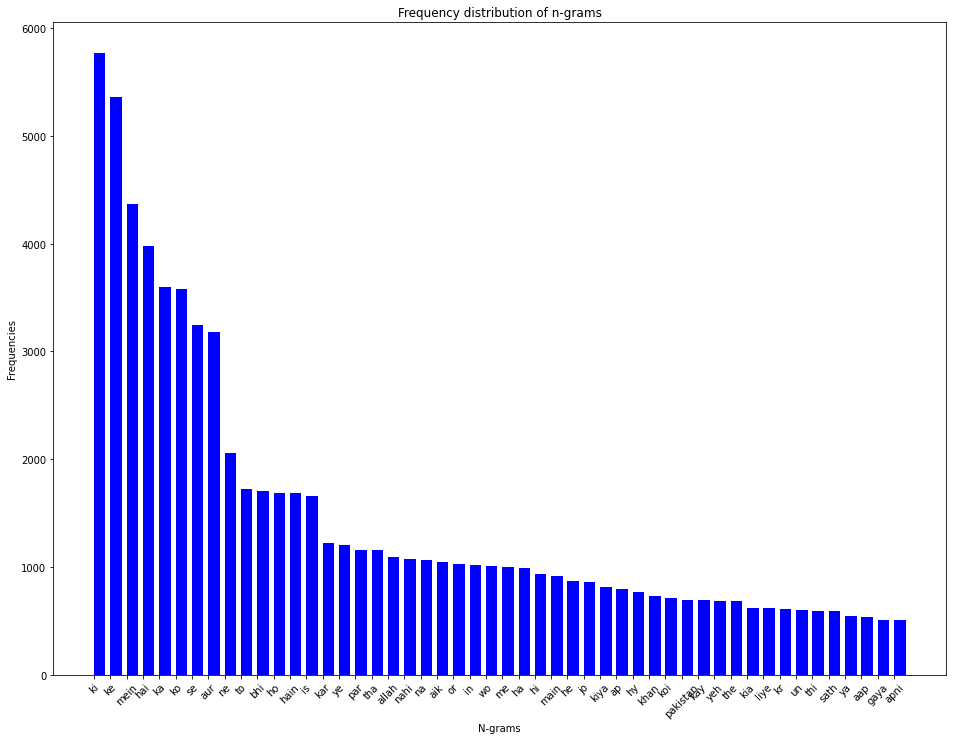

In [8]:
plot_frequency_distribution_of_ngrams(tokenize_df.tolist(), ngram_range=(1, 2), num_ngrams=50)

## Q6. Distribution of sample length

Text(0, 0.5, 'Number of samples')

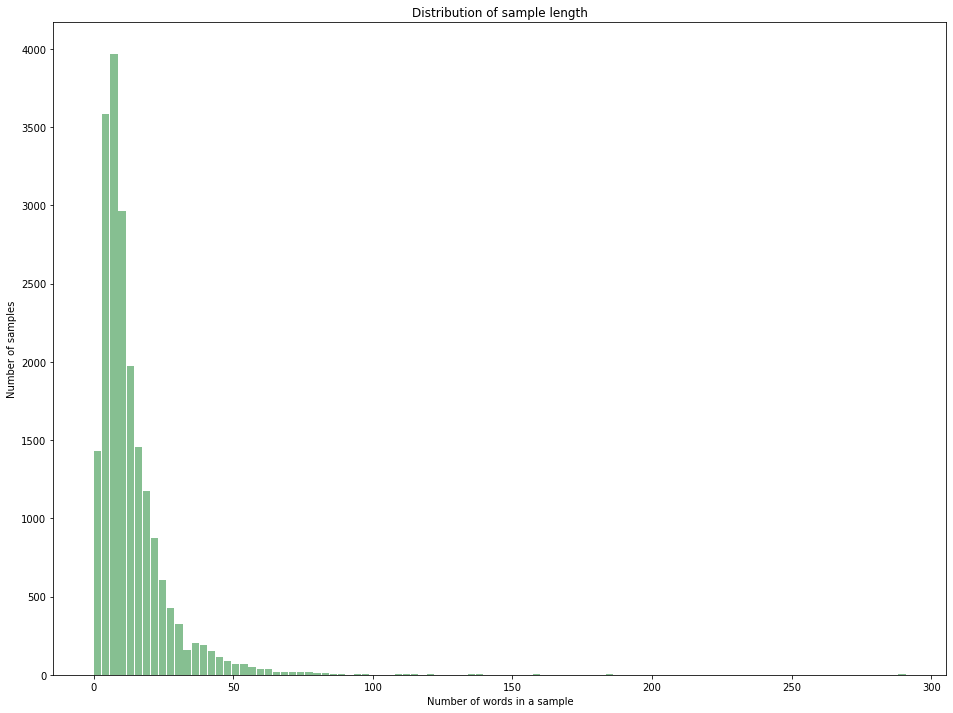

In [9]:
value_counts = count#.value_counts().sort_values()
ax = value_counts.plot.hist(bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.9)
ax.set_title('Distribution of sample length')
ax.set_xlabel('Number of words in a sample')
ax.set_ylabel('Number of samples')

In [10]:
tokenize_df

20087                                 yar spelling kesa theek hota wahan ja k bhi
19498                                         paen paihay guwach gye ne achasorry
19662                                                       hahaha teri bhabi hai
18265    mujhi cxn eid ty ehyo wathi aiyun ahin sunny wat athai k jo aa puro suit
17240                                                              kya ye sach hy
                                           ...                                   
7763                                           maze hain g apne pakistan main 😳 😜
15377                    allah pak ap ko lambi aur barkat wali zindgi atta farmay
17730                                                       idea ho gaya tha mjhe
15725                                                           ham sab k liy dua
19966                                                        han yar kash ho jata
Name: comment, Length: 20116, dtype: object